In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_games_extended.csv")

print("### Dataset Overview ###")
print("Number of rows:", len(df))
print("Columns:", df.columns.tolist())

df.head()

### Dataset Overview ###
Number of rows: 200
Columns: ['rawg_id', 'name', 'released', 'metacritic', 'rating', 'ratings_count', 'genres', 'steam_id', 'appid', 'steam_name', 'is_free', 'price', 'metacritic_score', 'tags', 'has_great_soundtrack', 'has_story_rich', 'has_atmospheric']


,rawg_id,name,released,metacritic,rating,ratings_count,genres,steam_id,appid,steam_name,is_free,price,metacritic_score,tags,has_great_soundtrack,has_story_rich,has_atmospheric
0,3328,The Witcher 3: Wild Hunt,2015-05-18,92.0,4.64,7088,"Action, RPG",292030,292030,The Witcher 3: Wild Hunt,False,299.0,93.0,"Single-player, Steam Achievements, Steam Tradi...",1,1,1
1,28,Red Dead Redemption 2,2018-10-26,96.0,4.59,5399,Action,1174180,1174180,Red Dead Redemption 2,False,6247.0,93.0,"Single-player, Multi-player, PvP, Online PvP, ...",1,1,1
2,3439,Life is Strange,2015-01-29,83.0,4.12,3750,Adventure,1265920,1265920,Life is Strange Remastered,False,29700.0,NaN,"Single-player, Steam Achievements, Full contro...",1,1,0
3,3439,Life is Strange,2015-01-29,83.0,4.12,3750,Adventure,1265920,1265920,Life is Strange Remastered,False,29700.0,NaN,"Single-player, Steam Achievements, Full contro...",1,1,0
4,32,Destiny 2,2017-09-06,82.0,3.52,2659,"Shooter, Action",1085660,1085660,Destiny 2,True,NaN,83.0,"Single-player, Multi-player, PvP, Online PvP, ...",0,0,1


In [3]:
print("### Basic Statistics ###")
numeric_cols = ["metacritic", "rating", "ratings_count", "price"]
print(df[numeric_cols].describe())

### Basic Statistics ###
       metacritic      rating  ratings_count         price
count  182.000000  200.000000     200.000000  1.810000e+02
mean    81.516484    3.938700    1464.840000  2.809896e+05
std      6.923198    0.427428     905.911654  3.264245e+06
min     62.000000    2.290000     244.000000  8.900000e+01
25%     76.250000    3.697500     876.000000  4.999000e+03
50%     82.000000    4.025000    1337.000000  2.680000e+04
75%     86.000000    4.280000    1747.250000  5.680000e+04
max     97.000000    4.640000    7088.000000  4.395000e+07


In [4]:
print("### Missing Values ###")
print(df.isna().sum())

### Missing Values ###
rawg_id                  0
name                     0
released                 0
metacritic              18
rating                   0
ratings_count            0
genres                   0
steam_id                 0
appid                    0
steam_name               0
is_free                  0
price                   19
metacritic_score        67
tags                     0
has_great_soundtrack     0
has_story_rich           0
has_atmospheric          0
dtype: int64


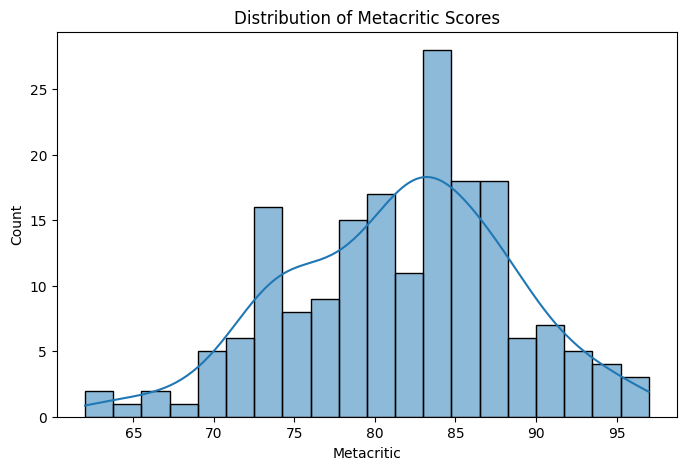

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["metacritic"], bins=20, kde=True)
plt.title("Distribution of Metacritic Scores")
plt.xlabel("Metacritic")
plt.ylabel("Count")
plt.show()

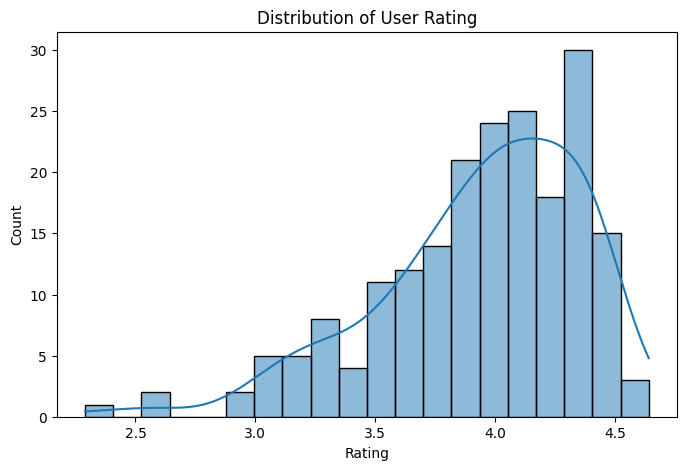

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["rating"], bins=20, kde=True)
plt.title("Distribution of User Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

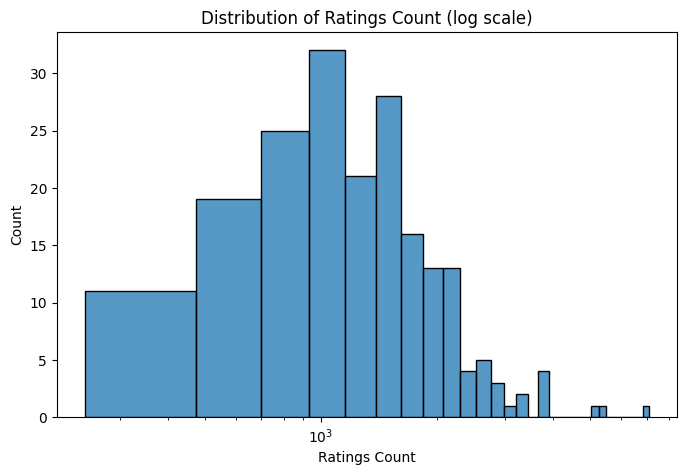

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["ratings_count"], bins=30)
plt.xscale("log")
plt.title("Distribution of Ratings Count (log scale)")
plt.xlabel("Ratings Count")
plt.ylabel("Count")
plt.show()

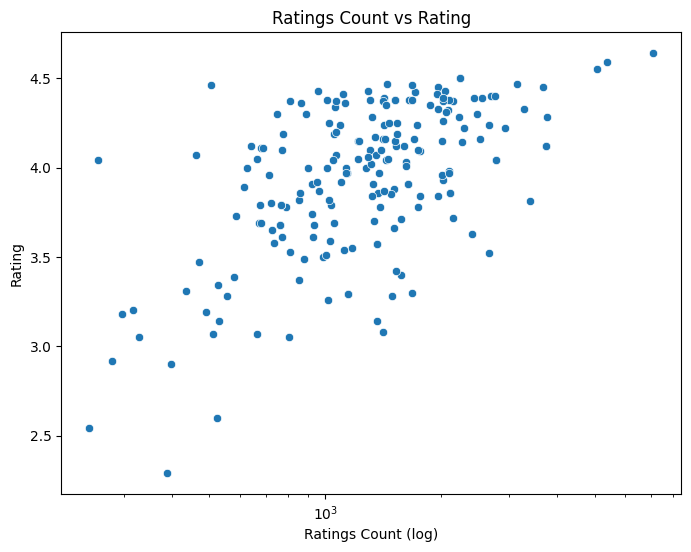

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="ratings_count", y="rating")
plt.xscale("log")
plt.title("Ratings Count vs Rating")
plt.xlabel("Ratings Count (log)")
plt.ylabel("Rating")
plt.show()

In [9]:
df["main_genre"] = df["genres"].apply(
    lambda x: x.split(",")[0] if isinstance(x, str) else "Unknown"
)

In [10]:
print("### Genre Distribution ###")
print(df["main_genre"].value_counts())

### Genre Distribution ###
main_genre
Shooter                  44
Adventure                41
Action                   35
Indie                    31
Strategy                 15
Platformer               13
Casual                    8
RPG                       5
Massively Multiplayer     3
Racing                    2
Card                      2
Fighting                  1
Name: count, dtype: int64


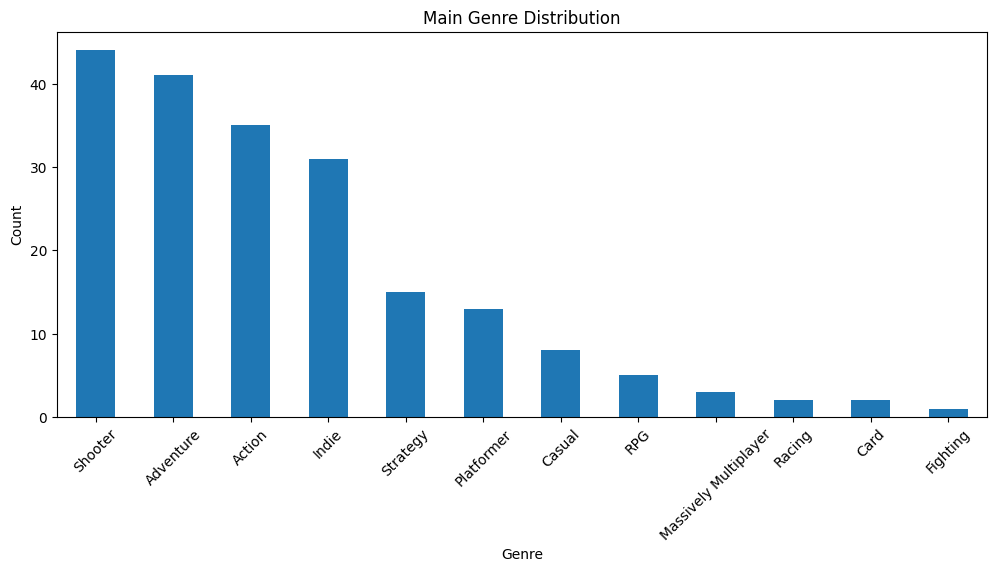

In [11]:
plt.figure(figsize=(12,5))
df["main_genre"].value_counts().plot(kind="bar")
plt.title("Main Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

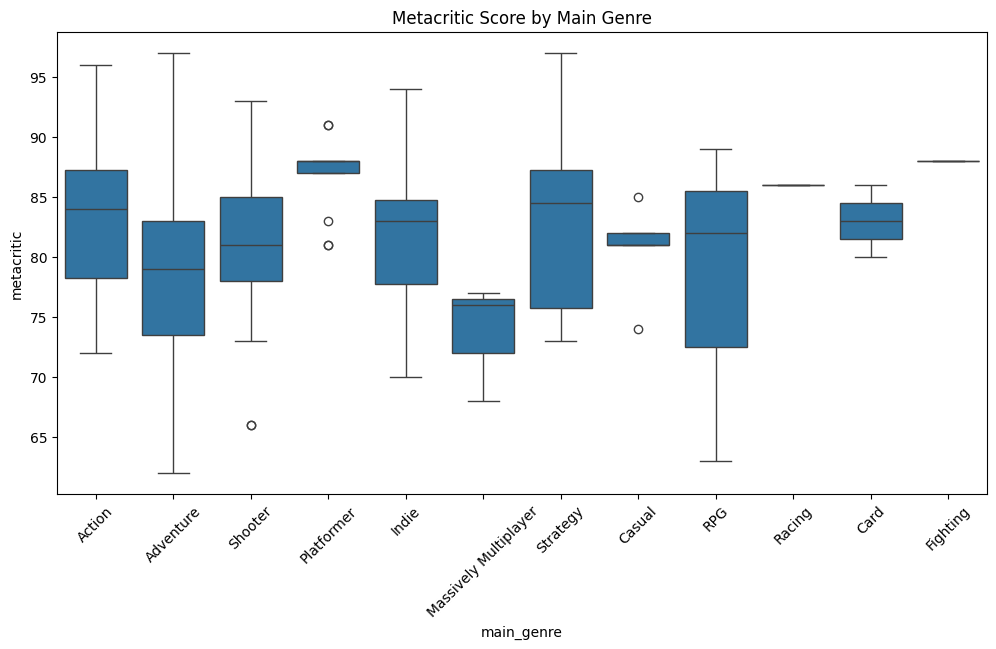

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="main_genre", y="metacritic")
plt.xticks(rotation=45)
plt.title("Metacritic Score by Main Genre")
plt.show()

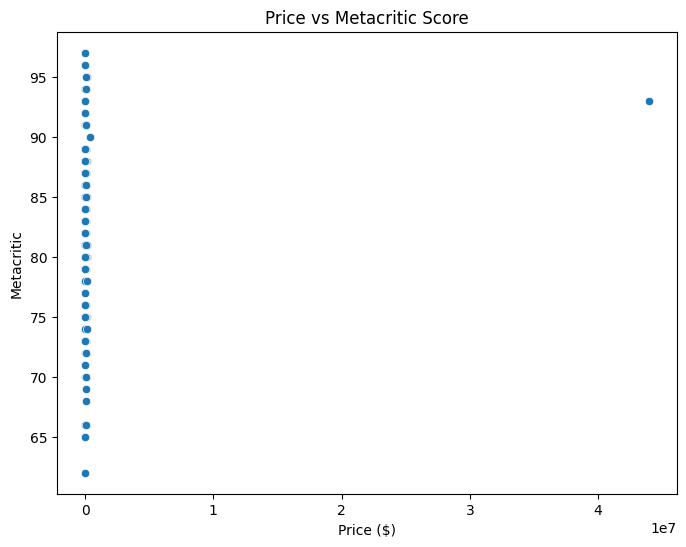

In [13]:
paid_df = df[df["price"] > 0]

plt.figure(figsize=(8,6))
sns.scatterplot(data=paid_df, x="price", y="metacritic")
plt.title("Price vs Metacritic Score")
plt.xlabel("Price ($)")
plt.ylabel("Metacritic")
plt.show()

In [14]:
tag_cols = ["has_great_soundtrack", "has_story_rich", "has_atmospheric"]

print("### Tag Counts ###")
print(df[tag_cols].sum())

### Tag Counts ###
has_great_soundtrack     96
has_story_rich          120
has_atmospheric         131
dtype: int64


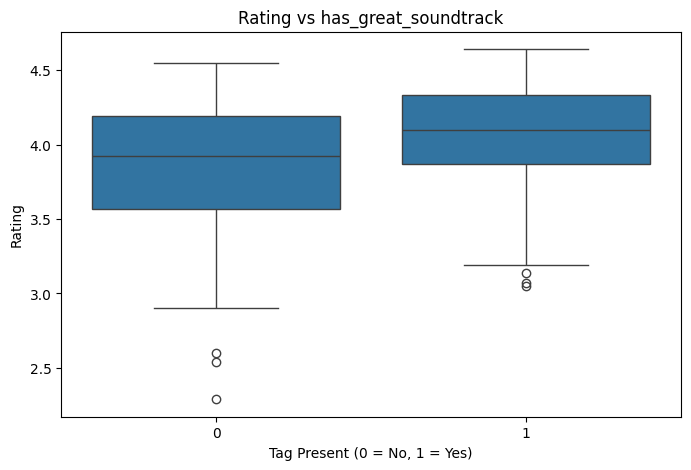

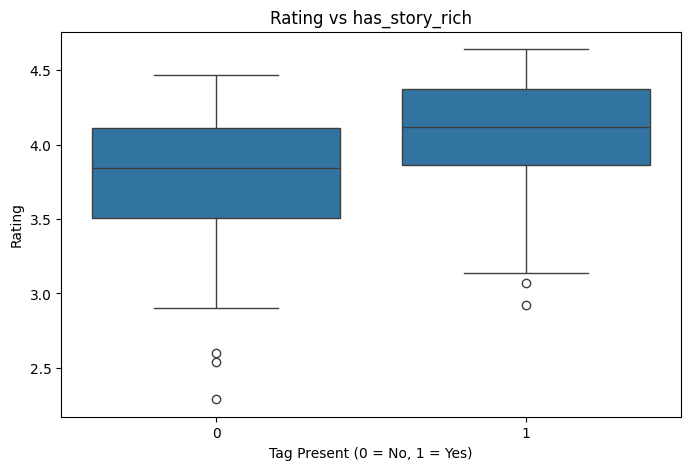

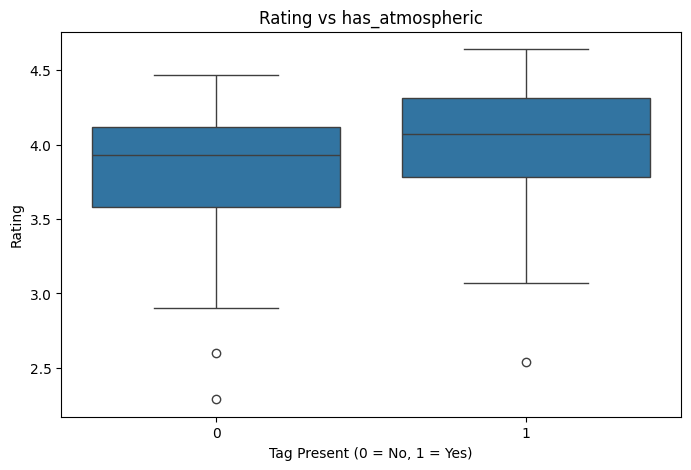

In [15]:
for tag in tag_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=tag, y="rating")
    plt.title(f"Rating vs {tag}")
    plt.xlabel("Tag Present (0 = No, 1 = Yes)")
    plt.ylabel("Rating")
    plt.show()

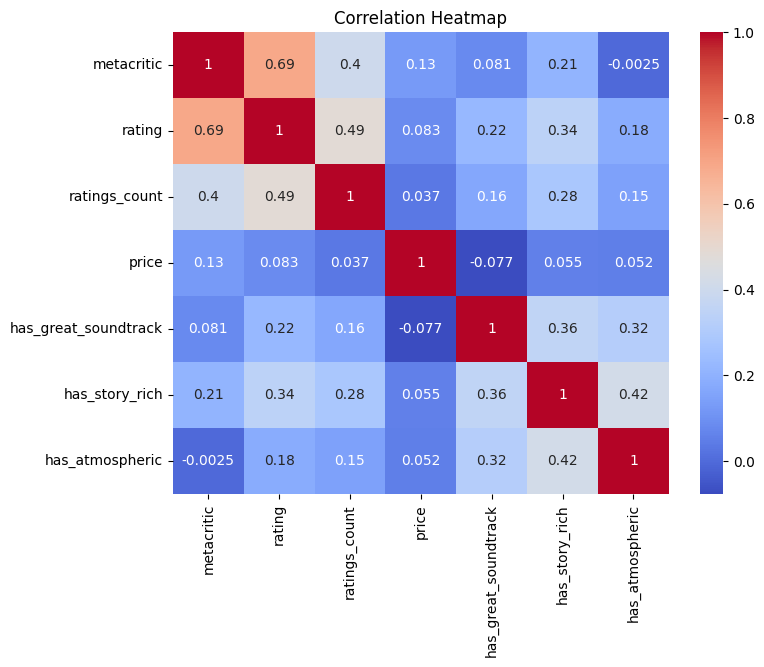

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + tag_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

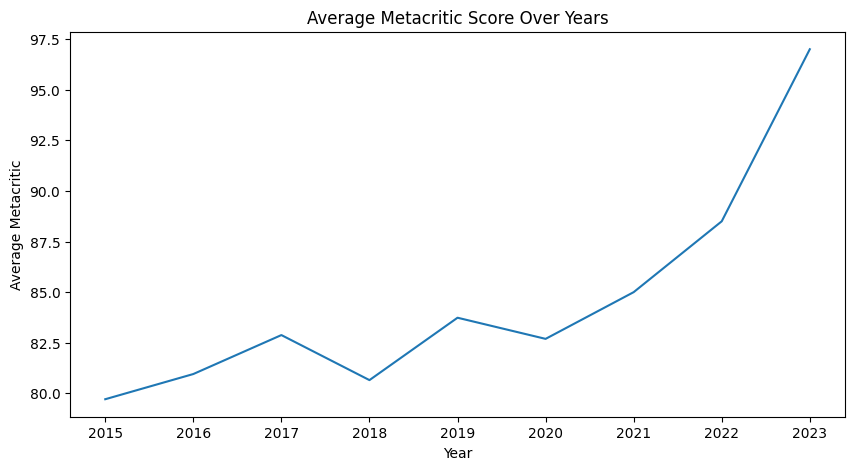

In [17]:
df["year"] = pd.to_datetime(df["released"], errors="coerce").dt.year

yearly = df.groupby("year")["metacritic"].mean()

plt.figure(figsize=(10,5))
yearly.plot()
plt.title("Average Metacritic Score Over Years")
plt.xlabel("Year")
plt.ylabel("Average Metacritic")
plt.show()